# Frame the problem

* *signal*: a piece of information fed into an ML system (see Shannon's information theory)
* *pipeline*: a series of processes to process data
* *component*: name of a processing unit in a pipeline

# Select a performance measure

* *standard deviation* (σ): square root of the *variance*, being the average of the squared deviation from the mean
* *root mean square error* (RMSE): measures the standard deviation of errors made by a system's predictions

```
RMSE(X, h) = sqrt(1/m Σ(h(x) - y))
```

(See book for actual formula.)

* m is the number of instances in dataset
* x all features of the nth instance
* y is the label for the nth instance
* X is matrix of all feature values (except target)
* h is the *hypothosis*: the system's prediction function
* y^ is *y-hat*, the prediction value of h(x)
* RMSE(X, h) is the *cost function*
  - generally preferred
* MEA: *Mean absolute error*: also called (*average absolute deviation*) (see formula in book)

```
MAE(X, h) = 1/m Σ|h(x) - y|
```

* RMSE corresponds to the *Euclidean norm*, or *l2 norm*, which measures distances with straight line, is usual geometry
* MAE corresponds to *Manhattan norm*, or *l1 norm*, which measures distance only with orthogonal lines (as going through city blocks)
* *lk norm*: see formula
* *l0* norm (of vector v): gives the cardinality of a vector (ie, number of elements)
* *l infinity*: the maximum absolute value of a vector
* The higher the norm index, the more it focuses on large values and not on smaller ones; RMSE is more sensitive to outliers than MAE. When outliers are exceptionally rare (as in a bell curve) the RMSE performs very well

# Explore housing data

In [3]:
import os
import pandas as pd

In [40]:
housing_file = os.path.expanduser('~/handson-ml/datasets/housing/housing.csv')

def load_housing_data(housing_path):
    return pd.read_csv(housing_path)

housing = load_housing_data(housing_file)

In [6]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [13]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [10]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


25%, 50%, 75% are all percentiles: the percentile below which a values fall; also called quartiles (25% being first quartile)

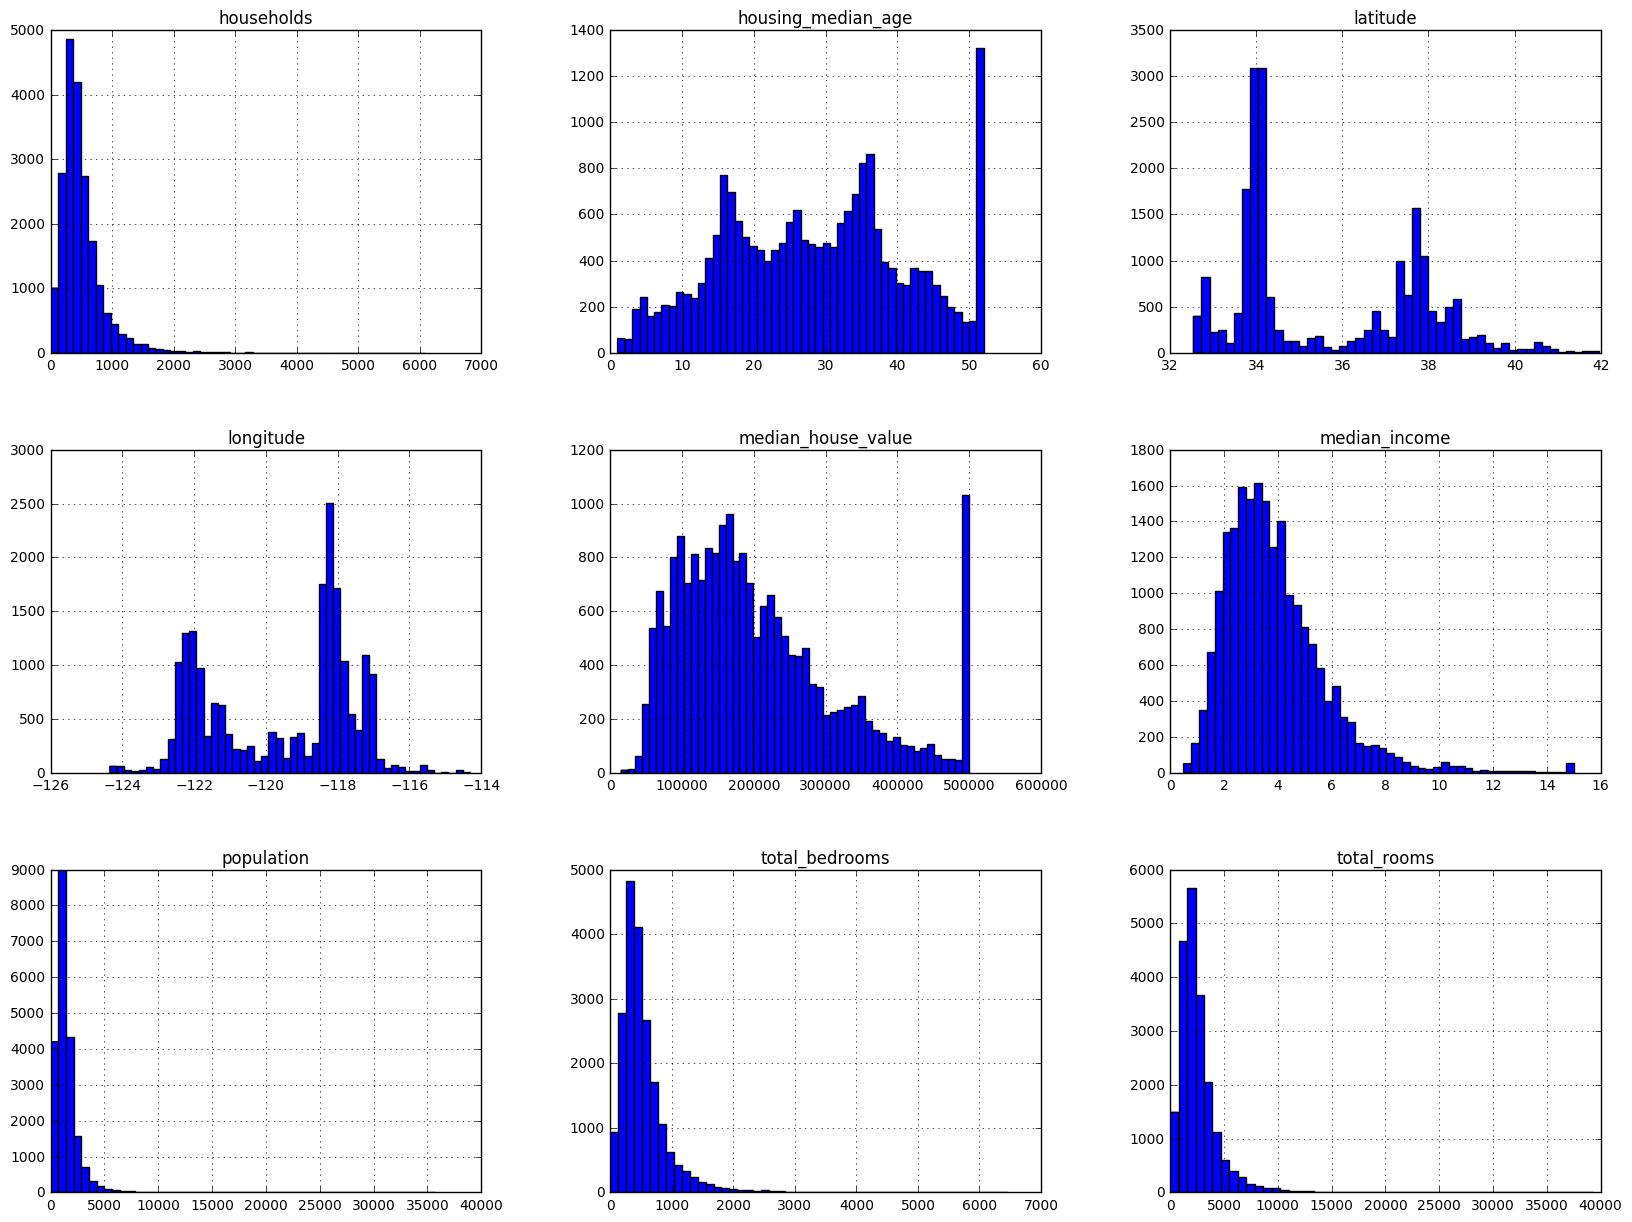

In [17]:
%matplotlib inline
import matplotlib.pylab as plt
housing.hist(bins=50, figsize=(20, 15))
plt.show()

These are *tail heavy*: extend farther to the right of the median than to the left

# Create a test set

* *data snooping*: looking at a test set

In [19]:
# simple set aside 20%

import numpy as np
import numpy.random as rnd

In [34]:
def split_train_test_data(data, test_ratio):
    shuffled_indices = rand.permutation(len(data))  # also can give constant for repeated values
    set_test_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:set_test_size]
    train_indices = shuffled_indices[set_test_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [35]:
train_set, test_set = split_train_test_data(housing, 0.2)
print('len train set:', len(train_set))
print('len test set:', len(test_set))

len train set: 16512
len test set: 4128


In [36]:
# set aside 20 but ensure test always remains the same
import hashlib

In [43]:
def test_set_check(identifier, test_ratio, hash):
    return hash(identifier).digest()[-1] < 256 * test_ratio

def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]

# use row index as id
housing_with_id = housing.reset_index() # adds an 'index' column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

TypeError: object supporting the buffer API required

In [44]:
# or just use sklearn cross validation
from sklearn.cross_validation import train_test_split

ImportError: No module named 'scipy'